In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

In [5]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 190s 1us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
X_train[0].shape

(32, 32, 3)

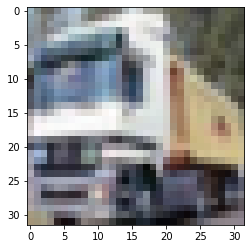

In [13]:
from matplotlib import pyplot as plt  
plt.imshow(X_train[1])

In [17]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [24]:
classes[y_train[1][0]]

'truck'

In [25]:
X_train = X_train/255
X_test = X_test/255

In [26]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## ANN

In [29]:
model = keras.Sequential(
[
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,y_train, epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 192s 119ms/step - loss: 1.8855 - accuracy: 0.3281
Epoch 2/5
1563/1563 [==============================] - 177s 113ms/step - loss: 1.6516 - accuracy: 0.4078
Epoch 3/5
1563/1563 [==============================] - 184s 118ms/step - loss: 1.5685 - accuracy: 0.4397
Epoch 4/5
1563/1563 [==============================] - 186s 119ms/step - loss: 1.5168 - accuracy: 0.4571
Epoch 5/5
1563/1563 [==============================] - 192s 123ms/step - loss: 1.4802 - accuracy: 0.4687


## CNN

In [41]:
cnn_model = keras.Sequential(
[
    keras.layers.Conv2D(filters= 32,kernel_size = (3,3) ,input_shape= (32,32,3),activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters= 64,kernel_size = (3,3) ,input_shape= (32,32,3),activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [42]:
cnn_model.compile(optimizer= 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy']
                 )

In [43]:
cnn_model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 74s 46ms/step - loss: 1.4634 - accuracy: 0.4750
Epoch 2/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.0932 - accuracy: 0.6155
Epoch 3/5
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9633 - accuracy: 0.6663
Epoch 4/5
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8841 - accuracy: 0.6919
Epoch 5/5
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8172 - accuracy: 0.71710s - loss: 0.8177 - ac


In [44]:
y_predict = cnn_model.predict(X_test)

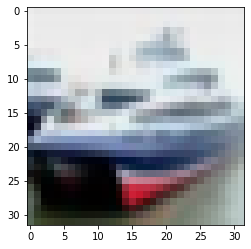

In [51]:
plt.imshow(X_test[1])

In [50]:
import numpy as np 
classes[np.argmax(y_predict[1])]

'ship'